In [13]:
# Measurements
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute
from qiskit import IBMQ, Aer, transpile, assemble
from qiskit.visualization import plot_histogram 
from qiskit.quantum_info import Operator
import numpy as np

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()


Consultamos las máquinas disponibles de IBM. Como nuestro programa se limita a dos qubits podemos ejecutarlo en una máquina pequeña, nosotros usaremos __ibmq_manila__.

In [ ]:
provider=IBMQ.get_provider(hub="ibm-q")
available_cloud_backends = provider.backends()
print("Backends")
for i in available_cloud_backends: print (i)

In [4]:
device = provider.get_backend("ibmq_manila")

In [5]:
def juego(thetaA,thetaB,phiA,phiB,alphaA,alphaB,deltaA,deltaB):
    '''Simulamos el juego.
    
    Parámetros: thetaA, thetaB, phiA, phiB, 
                alphaA,alphaB,deltaA,deltaB
                
    Ángulos de las matrices de A y B que codifican el juego particular
    
    El programa devuelve el histograma de la simulación
    '''
    
    # Cargamos el simulador Aer
    simulator = Aer.get_backend("qasm_simulator")

    # Creamos un QC 
    qr = QuantumRegister(2, 'q')
    crz, crx = ClassicalRegister(1, name="crz"), ClassicalRegister(1, name="crx")
    circuit = QuantumCircuit(qr, crz,crx)

    # Definimos la matriz de entrelazamiento
    I_2 = np.identity(4)    
    X_2 = np.matrix([[0,0,0,1], 
                       [0,0,1,0],
                       [0,1,0,0],
                       [1,0,0,0]])
    J_2 = Operator(1 / np.sqrt(2) * (I_2 + 1j *X_2))  
    J_2_dg = Operator(1 / np.sqrt(2) * (I_2 - 1j *X_2))    # inversa de J_2
    
    
    # Las matrices U_A y U_B son la jugada del jugador A y el jugador B
    
    U_A = matriz(thetaA,phiA,alphaA,deltaA)
    U_B = matriz(thetaB,phiB,alphaB,deltaB)

    # Generamos el circuito
    circuit.append(J_2, [0,1])
    circuit.append(U_A,[0]) # asignamos la puerta UA al jugador 1
    circuit.append(U_B,[1]) # asignamos la puerta UB al jugador 2
    circuit.append(J_2_dg, [0,1])

    # Medimos las qubits
    circuit.measure(qr[0],crz)
    circuit.measure(qr[1],crx)
    

    # Ejecutamos el circuito en el simulador qasm
    job = execute(circuit, simulator,shots=1024)
    
    # Los resultados de job
    result = job.result()
    
    # Contamos los resultados
    counts = result.get_counts(circuit)
    # print(counts,"\n")
    
    # Dibujamos el circuito
    dib = circuit.draw()
    print(dib,"\n")
    
    # Devolvemos el histograma de resultados
    return plot_histogram(counts)

Veamos que, a pesar del ruido, los resultados en el ordenador cuántico son equivalentes a los de la simulación.

Job Status: job has successfully run
61744f39b02bdc9f28d84d87


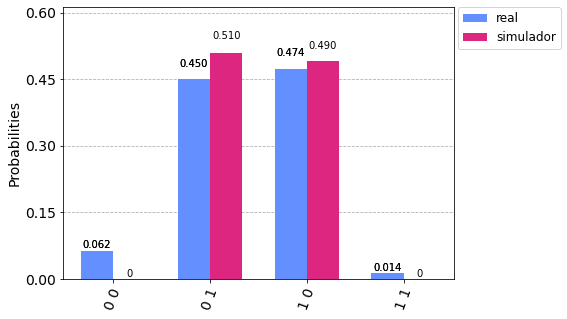

In [6]:
# Caso del prisionero cuántico
proceso(0,pi,pi/4,0,0,3*pi/2,pi/4,pi/2)